In [1]:


import torch
import torchaudio
import os
import shutil
import random
import librosa

In [2]:


# Define root directory
root_dir = '/tmp/GTZAN'
source_dir='../GTZAN/genres_original'


if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(tmp_path,SOURCE_DIR):
    """
    Creates directories for the train and test sets

    Args:
    tmp_path (string) - the base directory path to create subdirectories from

    Returns:
    None
    """

    ### START CODE HERE

    # HINT:
    # Use os.makedirs to create your directories with intermediate subdirectories
    # Don't hardcode the paths. Use os.path.join to append the new directories to the tmp_path parameter


    tmp_path_training = os.path.join(tmp_path, 'training')
    tmp_path_validation = os.path.join(tmp_path, 'validation')
    tmp_path_test = os.path.join(tmp_path, 'test')
    
    os.makedirs(tmp_path_training)
    os.makedirs(tmp_path_validation)
    os.makedirs(tmp_path_test)
    """
    for repertory in os.listdir(SOURCE_DIR):
        
        repertory_path = os.path.join(SOURCE_DIR, repertory)
        if not os.path.isdir(repertory_path) or repertory == ".DS_Store":
            continue
            
        tmp_path_training_repertory = os.path.join(tmp_path_training, repertory)
        tmp_path_validation_repertory = os.path.join(tmp_path_validation, repertory)
        tmp_path_test_repertory = os.path.join(tmp_path_test, repertory)

        os.makedirs(tmp_path_training_repertory)
        os.makedirs(tmp_path_validation_repertory)
        os.makedirs(tmp_path_test_repertory)"""
        
try:
    create_train_val_dirs(tmp_path=root_dir,SOURCE_DIR=source_dir )
except FileExistsError:
    print("You should not be seeing this since the upper directory is removed beforehand")

In [3]:


# Test your create_train_val_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/GTZAN/validation
/tmp/GTZAN/training
/tmp/GTZAN/test


In [4]:


root=os.getcwd()+'/../../data/Data/genres_original'

def copy_data_from_source_to(tab_files, SOURCE_DIR, PATH_DIR):
    for file in tab_files:
        source_path = os.path.join(SOURCE_DIR, file)
        destination_path = os.path.join(PATH_DIR, file)

        if os.path.getsize(source_path) > 0 and source_path.endswith(".wav"):
            shutil.copy(source_path, destination_path)
        else:
            print(f"{file} is zero length, so ignoring.")
    print(tab_files[0])
    #pixel_count = get_image_pixel_count(tab_files[0])
    #print( tab_files[0].dtype)

# SPLIT = 80/10/10
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, TEST_DIR):
    all_files = os.listdir(SOURCE_DIR)
    random.shuffle(all_files)

    split_one = int(len(all_files) * 0.8)
    split_two = int(len(all_files) * 0.9)
    
    training_files = all_files[:split_one]
    validation_files = all_files[split_one:split_two]
    test_files = all_files[split_two:]

    copy_data_from_source_to(training_files, SOURCE_DIR, TRAINING_DIR)
    copy_data_from_source_to(validation_files, SOURCE_DIR, VALIDATION_DIR)
    copy_data_from_source_to(test_files, SOURCE_DIR, TEST_DIR)

In [5]:


TEST_DIR= os.path.join( root_dir,os.listdir(root_dir)[0]) 
TRAINING_DIR= os.path.join( root_dir,os.listdir(root_dir)[1])
VALIDATION_DIR= os.path.join( root_dir,os.listdir(root_dir)[2])

print (TEST_DIR)
print (TRAINING_DIR)
print (VALIDATION_DIR)

for rootdir, dirs, files in os.walk(source_dir):
    for subdir in dirs:
        SUB_ROOT_DIR=os.path.join(rootdir, subdir)
        
        split_data(SOURCE_DIR=SUB_ROOT_DIR, TRAINING_DIR=TRAINING_DIR, VALIDATION_DIR=VALIDATION_DIR, TEST_DIR=TEST_DIR)
        
        print(f"Original directory has {len(os.listdir(SUB_ROOT_DIR))} images of ",subdir,"\n")
        
        print(f"There are {len(os.listdir(TRAINING_DIR))} images of ",subdir," for training")
        print(f"There are {len(os.listdir(VALIDATION_DIR))} images of ",subdir," for validation")
        print(f"There are {len(os.listdir(TEST_DIR))} images of ",subdir," for testing")

/tmp/GTZAN/validation
/tmp/GTZAN/training
/tmp/GTZAN/test
hiphop.00022.wav
hiphop.00013.wav
hiphop.00028.wav
Original directory has 100 images of  hiphop 

There are 80 images of  hiphop  for training
There are 10 images of  hiphop  for validation
There are 10 images of  hiphop  for testing
blues.00036.wav
blues.00085.wav
blues.00034.wav
Original directory has 100 images of  blues 

There are 160 images of  blues  for training
There are 20 images of  blues  for validation
There are 20 images of  blues  for testing
country.00099.wav
country.00079.wav
country.00035.wav
Original directory has 100 images of  country 

There are 240 images of  country  for training
There are 30 images of  country  for validation
There are 30 images of  country  for testing
classical.00087.wav
classical.00065.wav
classical.00057.wav
Original directory has 100 images of  classical 

There are 320 images of  classical  for training
There are 40 images of  classical  for validation
There are 40 images of  class

In [6]:


import os
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim 
import librosa
from pydub import AudioSegment
import numpy as np
import pandas as pd
import plotly.express as px
import random
from sklearn.preprocessing import StandardScaler


label_mapping = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4,'jazz': 5,'metal': 6,'pop': 7,'reggae': 8, 'rock': 9 }

"""
def convertSongToMatrice(audio_path, size=128):
    y, sr = librosa.load(audio_path, sr=None)
    win_length = int(sr / 10)  # Convert to int
    hop_length = win_length // 2  # Half the window size

    D = np.abs(librosa.stft(y, win_length=win_length, hop_length=hop_length))
    spectrogram = librosa.feature.melspectrogram(S=D, sr=sr)
    spectrogram = librosa.util.fix_length(spectrogram, size=size)
    return spectrogram

"""
def convertSongToMatrice(audio_path, size=599):
    y, sr = librosa.load(audio_path)
    n_fft= (sr/10) /2 +3
    #print(n_fft)
    D = np.abs(librosa.stft(y ,hop_length= int(n_fft)))
    spectrogram = librosa.feature.melspectrogram(S=D, sr=sr)
    #print(spectrogram.shape)
    S = librosa.util.fix_length(spectrogram,size= size)
    S_db = librosa.power_to_db(S, ref=np.max)
    
    S_db_norm = (S_db - S_db.min()) / (S_db.max() - S_db.min() + 1e-9)
    return S_db_norm

def string_to_label(string, mapping):
    return mapping[string]


def createDataset(files):
    list_Matrice = []
    list_label = []

    for root, dirs, files in os.walk(files):
        for SongName in files:
            audio_path = os.path.join(root, SongName)

            spectrogram = convertSongToMatrice(audio_path)
            spectrogram = torch.tensor(spectrogram)
            # Ajouter la dimension du canal
            spectrogram = spectrogram.unsqueeze(0)
            
            label = string_to_label(SongName.split('.')[0],label_mapping)

            list_Matrice.append(spectrogram)
            list_label.append(label)

    tensor_x = torch.stack(list_Matrice) 
    tensor_y = torch.LongTensor(list_label)
    print ("tensor_x",tensor_x.shape)
    print ("tensor_y",tensor_y.shape)

    dataset = TensorDataset(tensor_x, tensor_y)
    return dataset

def train_val_generators(TRAINING_DIR, VALIDATION_DIR, TEST_DIR, batch_size=32):
    train_dataset = createDataset(TRAINING_DIR)
    validation_dataset = createDataset(VALIDATION_DIR)
    test_dataset = createDataset(TEST_DIR)

    train_generator = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    validation_generator = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
    test_generator = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_generator, validation_generator, test_generator

In [7]:


from torch.utils.data import DataLoader

train_generator, validation_generator, test_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR, TEST_DIR)

tensor_x torch.Size([799, 1, 128, 599])
tensor_y torch.Size([799])
tensor_x torch.Size([100, 1, 128, 599])
tensor_y torch.Size([100])
tensor_x torch.Size([100, 1, 128, 599])
tensor_y torch.Size([100])


In [8]:


class CAM(nn.Module):
    def __init__(self, channels, r):
        super(CAM, self).__init__()
        self.channels = channels
        self.r = r
        self.linear = nn.Sequential(
            nn.Linear(in_features=self.channels, out_features=self.channels//self.r, bias=True),
            nn.ReLU(inplace=True),
            nn.Linear(in_features=self.channels//self.r, out_features=self.channels, bias=True))

    def forward(self, x):
        max = F.adaptive_max_pool2d(x, output_size=1)
        avg = F.adaptive_avg_pool2d(x, output_size=1)
        b, c, _, _ = x.size()
        linear_max = self.linear(max.view(b,c)).view(b, c, 1, 1)
        linear_avg = self.linear(avg.view(b,c)).view(b, c, 1, 1)
        output = linear_max + linear_avg
        output = F.sigmoid(output) * x
        return output
    

class SAM(nn.Module):
    def __init__(self, bias=False):
        super(SAM, self).__init__()
        self.bias = bias
        self.conv = nn.Conv2d(in_channels=2, out_channels=1, kernel_size=7, stride=1, padding=3, dilation=1, bias=self.bias)

    def forward(self, x):
        max = torch.max(x,1)[0].unsqueeze(1)
        avg = torch.mean(x,1).unsqueeze(1)
        concat = torch.cat((max,avg), dim=1)
        output = self.conv(concat)
        output = F.sigmoid(output) * x 
        return output     

class CBAM(nn.Module):
    def __init__(self, channels, r):
        super(CBAM, self).__init__()
        self.channels = channels
        self.r = r
        self.sam = SAM(bias=False)
        self.cam = CAM(channels=self.channels, r=self.r)

    def forward(self, x):
        output = self.cam(x)
        output = self.sam(output)
        return output + x

In [9]:


from torch.nn import Module
import torch.nn.functional as F

# --- Playlist Generation Functions ---

def extract_features_from_model_pytorch(model, data_loader):
    model.eval()
    all_features = []
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for inputs, labels in data_loader:
            outputs = model(inputs)
            # Assuming the last layer before classification is the feature layer
            # For SimpleCNN, the output of the forward pass is directly the classification logits
            # We'll use these logits as features for PCA, or we could modify the model to return intermediate features.
            # For now, let's use the output logits as features.
            features = outputs.cpu().numpy()
            predictions = torch.argmax(outputs, axis=1).cpu().numpy()

            all_features.append(features)
            all_labels.append(labels.cpu().numpy())
            all_predictions.append(predictions)

    features_array = np.concatenate(all_features, axis=0)
    labels_array = np.concatenate(all_labels, axis=0)
    predictions_array = np.concatenate(all_predictions, axis=0)
    return features_array, labels_array, predictions_array

def perform_pca_analysis_pytorch(features, labels, n_components=2):
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    pca = PCA(n_components=n_components)
    features_pca = pca.fit_transform(features_scaled)

    print(f"PCA explained variance ratio: {pca.explained_variance_ratio_}")
    print(f"Total explained variance: {pca.explained_variance_ratio_.sum():.3f}")

    return features_pca, pca, scaler

def generate_playlist_line_pytorch(pca_df, track1_id, track2_id, num_tracks=10):
    track1_data = pca_df[pca_df['track_id'] == track1_id]
    track2_data = pca_df[pca_df['track_id'] == track2_id]

    if len(track1_data) == 0 or len(track2_data) == 0:
        print("One or both tracks not found!")
        return None, None, None, None

    p1 = np.array([track1_data['PC1'].iloc[0], track1_data['PC2'].iloc[0]])
    p2 = np.array([track2_data['PC1'].iloc[0], track2_data['PC2'].iloc[0]])

    print(f"Track 1 ({track1_id}): PC1={p1[0]:.3f}, PC2={p1[1]:.3f}")
    print(f"Track 2 ({track2_id}): PC1={p2[0]:.3f}, PC2={p2[1]:.3f}")

    t_values = np.linspace(0, 1, num_tracks)
    line_points = np.array([p1 + t * (p2 - p1) for t in t_values])

    playlist_tracks = []
    used_tracks = set()

    for i, target_point in enumerate(line_points):
        distances = []
        for idx, row in pca_df.iterrows():
            if row['track_id'] not in used_tracks:
                track_point = np.array([row['PC1'], row['PC2']])
                distance = np.linalg.norm(track_point - target_point)
                distances.append((distance, row['track_id'], row['genre_name'], track_point))

        if distances:
            distances.sort(key=lambda x: x[0])
            closest_distance, closest_track, closest_genre, closest_point = distances[0]

            playlist_tracks.append({
                'position': i + 1,
                'track_id': closest_track,
                'genre': closest_genre,
                'distance_to_line': closest_distance,
                'target_point': target_point,
                'actual_point': closest_point,
                'PC1': closest_point[0],
                'PC2': closest_point[1]
            })

            used_tracks.add(closest_track)

    return playlist_tracks, line_points, p1, p2

def interactive_playlist_generator_pytorch(pca_df, genre_names):
    print("Available tracks (first 20 shown):")
    for i, (idx, row) in enumerate(pca_df.head(20).iterrows()):
        print(f"{i+1:2d}. {row["track_id"]} ({row["genre_name"]})")

    print("\nExample usage:")
    print("track1 = pca_df.iloc[0][\"track_id\"]  # First track")
    print("track2 = pca_df.iloc[10][\"track_id\"]  # Eleventh track")
    print("playlist, line_points, p1, p2 = generate_playlist_line_pytorch(pca_df, track1, track2, num_tracks=8)")
    print("visualize_playlist_pytorch(pca_df, playlist, line_points, p1, p2, track1, track2, genre_names)")

def analyze_playlist_quality_pytorch(playlist, pca_df, genre_names):
    if not playlist:
        return None

    genres_in_playlist = [track["genre"] for track in playlist]
    unique_genres = len(set(genres_in_playlist))
    genre_distribution = pd.Series(genres_in_playlist).value_counts()

    distances = [track["distance_to_line"] for track in playlist]
    avg_distance = np.mean(distances)
    std_distance = np.std(distances)
    max_distance = np.max(distances)

    smoothness_distances = []
    for i in range(len(playlist) - 1):
        p1 = np.array([playlist[i]["PC1"], playlist[i]["PC2"]])
        p2 = np.array([playlist[i+1]["PC1"], playlist[i+1]["PC2"]])
        smoothness_distances.append(np.linalg.norm(p2 - p1))

    avg_smoothness = np.mean(smoothness_distances) if smoothness_distances else 0

    analysis = {
        "num_tracks": len(playlist),
        "unique_genres": unique_genres,
        "genre_diversity_ratio": unique_genres / len(playlist),
        "avg_distance_to_line": avg_distance,
        "std_distance_to_line": std_distance,
        "max_distance_to_line": max_distance,
        "avg_smoothness": avg_smoothness,
        "genre_distribution": genre_distribution.to_dict()
    }

    return analysis

def visualize_playlist_pytorch(pca_df, playlist, line_points, p1, p2, track1_id, track2_id, genre_names):
    plt.figure(figsize=(14, 10))

    colors = plt.cm.Set3(np.linspace(0, 1, len(genre_names)))
    for i, genre in enumerate(genre_names):
        mask = pca_df["genre_label_id"] == i
        plt.scatter(
            pca_df[mask]["PC1"], 
            pca_df[mask]["PC2"], 
            c=[colors[i]], 
            label=genre, 
            alpha=0.3, 
            s=30
        )

    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], "k--", linewidth=2, alpha=0.7, label="Playlist Line")

    plt.scatter(
        line_points[:, 0], line_points[:, 1], 
        c="red", s=50, alpha=0.5, marker="x", label="Target Points"
    )

    plt.scatter([p1[0]], [p1[1]], c="blue", s=200, marker="*", 
                edgecolors="black", linewidth=2, label=f"Start: {track1_id}")
    plt.scatter([p2[0]], [p2[1]], c="green", s=200, marker="*", 
                edgecolors="black", linewidth=2, label=f"End: {track2_id}")

    playlist_points = np.array([[track["PC1"], track["PC2"]] for track in playlist])
    plt.scatter(
        playlist_points[:, 0], playlist_points[:, 1], 
        c="red", s=100, alpha=0.8, edgecolors="black", linewidth=1, label="Playlist Tracks"
    )

    for track in playlist:
        plt.annotate(
            str(track["position"]), 
            (track["PC1"], track["PC2"]), 
            xytext=(5, 5), textcoords="offset points",
            fontsize=8, fontweight="bold"
        )

    for track in playlist:
        target = track["target_point"]
        actual = track["actual_point"]
        plt.plot([target[0], actual[0]], [target[1], actual[1]], "r-", alpha=0.3, linewidth=1)

    plt.xlabel(f"PC1 (variance)") # PCA model not directly available here, so removing variance percentage
    plt.ylabel(f"PC2 (variance)")
    plt.title(f"Playlist Generation: {track1_id} -> {track2_id}")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    colors = plt.cm.Set3(np.linspace(0, 1, len(genre_names)))
    for i, genre in enumerate(genre_names):
        mask = pca_df['genre_label_id'] == i
        plt.scatter(
            pca_df[mask]['PC1'], 
            pca_df[mask]['PC2'], 
            c=[colors[i]], 
            label=genre, 
            alpha=0.3, 
            s=30
        )

    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k--', linewidth=2, alpha=0.7, label='Playlist Line')

    plt.scatter(
        line_points[:, 0], line_points[:, 1], 
        c='red', s=50, alpha=0.5, marker='x', label='Target Points'
    )

    plt.scatter([p1[0]], [p1[1]], c='blue', s=200, marker='*', 
                edgecolors='black', linewidth=2, label=f'Start: {track1_id}')
    plt.scatter([p2[0]], [p2[1]], c='green', s=200, marker='*', 
                edgecolors='black', linewidth=2, label=f'End: {track2_id}')

    playlist_points = np.array([[track['PC1'], track['PC2']] for track in playlist])
    plt.scatter(
        playlist_points[:, 0], playlist_points[:, 1], 
        c='red', s=100, alpha=0.8, edgecolors='black', linewidth=1, label='Playlist Tracks'
    )

    for track in playlist:
        plt.annotate(
            str(track['position']), 
            (track['PC1'], track['PC2']), 
            xytext=(5, 5), textcoords='offset points',
            fontsize=8, fontweight='bold'
        )

    for track in playlist:
        target = track['target_point']
        actual = track['actual_point']
        plt.plot([target[0], actual[0]], [target[1], actual[1]], 'r-', alpha=0.3, linewidth=1)

    plt.xlabel(f'PC1 (variance)') # PCA model not directly available here, so removing variance percentage
    plt.ylabel(f'PC2 (variance)')
    plt.title(f'Playlist Generation: {track1_id} -> {track2_id}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def interactive_playlist_generator_pytorch(pca_df, genre_names):
    print("Available tracks (first 20 shown):")
    for i, (idx, row) in enumerate(pca_df.head(20).iterrows()):
        print(f"{i+1:2d}. {row['track_id']} ({row['genre_name']})")

    print("\nExample usage:")
    print("track1 = pca_df.iloc[0]['track_id']  # First track")
    print("track2 = pca_df.iloc[10]['track_id']  # Eleventh track")
    print("playlist, line_points, p1, p2 = generate_playlist_line_pytorch(pca_df, track1, track2, num_tracks=8)")
    print("visualize_playlist_pytorch(pca_df, playlist, line_points, p1, p2, track1, track2, genre_names)")

def analyze_playlist_quality_pytorch(playlist, pca_df, genre_names):
    if not playlist:
        return None

    genres_in_playlist = [track['genre'] for track in playlist]
    unique_genres = len(set(genres_in_playlist))
    genre_distribution = pd.Series(genres_in_playlist).value_counts()

    distances = [track['distance_to_line'] for track in playlist]
    avg_distance = np.mean(distances)
    std_distance = np.std(distances)
    max_distance = np.max(distances)

    smoothness_distances = []
    for i in range(len(playlist) - 1):
        p1 = np.array([playlist[i]['PC1'], playlist[i]['PC2']])
        p2 = np.array([playlist[i+1]['PC1'], playlist[i+1]['PC2']])
        smoothness_distances.append(np.linalg.norm(p2 - p1))

    avg_smoothness = np.mean(smoothness_distances) if smoothness_distances else 0

    analysis = {
        'num_tracks': len(playlist),
        'unique_genres': unique_genres,
        'genre_diversity_ratio': unique_genres / len(playlist),
        'avg_distance_to_line': avg_distance,
        'std_distance_to_line': std_distance,
        'max_distance_to_line': max_distance,
        'avg_smoothness': avg_smoothness,
        'genre_distribution': genre_distribution.to_dict()
    }

    return analysis

class SimpleCNN(Module):
    def __init__(self, dropout=0.3):
        # call the parent constructor
        super(SimpleCNN, self).__init__()
        
        # Convolutional layer convolution d'une matrice de taille total 128x599 en convolutionnant des layer de taille 128x4 avec un pas de en 0x1 
        # PADDING 4 DIMENSION
        self.norm1 = nn.BatchNorm2d(1) 
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=256, kernel_size=(128,4), padding=(0,1))
        self.relu = nn.ReLU()
        self.cbam1 = CBAM(256, r=16)
        self.pool1 = nn.MaxPool2d(kernel_size=(1,4))
        
        # Convolutional layer 2
        self.norm2 = nn.BatchNorm2d(1) 
        self.conv2 = nn.Conv2d(in_channels=1, out_channels=256, kernel_size= (256,4)) 
        self.pool2 = nn.MaxPool2d(kernel_size=(1,2))
        
        self.norm3 = nn.BatchNorm2d(1)
        self.conv3 = nn.Conv2d(in_channels=1, out_channels=512, kernel_size=(256,4) )
        self.cbam2 = CBAM(512, r=16)
        
        self.norm4 = nn.BatchNorm2d(1) 
        self.conv4 = nn.Conv2d(in_channels=1, out_channels=512, kernel_size=(512,4) )

        
        # Fully connected layers
        self.normfc2 = nn.BatchNorm1d(1536)
        self.fc2 = nn.Linear(1536, 2048)
        self.normfc3 = nn.BatchNorm1d(2048)
        self.drop1 = nn.Dropout2d(p=dropout)  
        self.fc3 = nn.Linear(2048, 1024)
        self.normfc4 = nn.BatchNorm1d(1024) 
        self.drop2 = nn.Dropout2d(p=dropout) 
        self.fc4 = nn.Linear(1024, 10)
        

    def forward(self, x):
        #print(" input layer :", x.shape)
        
        #print (" first  layer")
        x = self.norm1(x)
        #print(" norm1 :", x.shape)
        x = self.conv1(x)
        #print(" conv1 :", x.shape)
        x = self.relu(x)
        #print(" relu :", x.shape)
        x = self.cbam1(x)
        #print(" cbam1 :", x.shape)
        x = self.pool1(x)
        #print(" pool1 :", x.shape)
        x = torch.permute(x,(0,2,1,3))
        #print(" permute 1 :", x.shape)
        
        #print (" second  layer")
        x = self.norm2(x)
        #print(" norm2 :", x.shape)
        x = self.conv2(x)
        #print(" conv2 :", x.shape)
        x = self.relu(x)
        #print(" relu :", x.shape)
        x = self.cbam1(x)
        #print(" cbam1 :", x.shape
        x = self.pool2(x)
        #print(" pool2 :", x.shape)
        x = torch.permute(x,(0,2,1,3))
        #print(" permute 2 :", x.shape)
        
        
        #print (" third  layer")
        x = self.norm3(x)
        #print(" norm3 :", x.shape)
        x = self.conv3(x)
        #print(" conv3 :", x.shape)
        x = self.relu(x)
        x = self.cbam2(x)
        #print(" cbam1 :", x.shape
        #print(" relu :", x.shape)
        x = self.pool2(x)
        #print(" pool2 :", x.shape)
        x = torch.permute(x,(0,2,1,3))
        #print(" permute 3 :", x.shape)
        
        #print (" four bis  layer")
        x = self.norm4(x)
        #print(" norm4 :", x.shape)
        x = self.conv4(x)
        #print(" conv4 :", x.shape)
        x = self.cbam2(x)
        #print(" cbam1 :", x.shape
        x = self.relu(x)
        #print(" relu :", x.shape)
        x = torch.permute(x,(0,2,1,3))
        #print(" permute 4 :", x.shape)
        
        #print (" five sub layer ")
        mean_values = torch.mean(x, dim=3, keepdim=True)
        #print(mean_values.shape)
        max_values, _ = torch.max(x, dim=3, keepdim=True)
        #print(max_values.shape)
        l2_norm = torch.linalg.norm(x, dim=3, ord= 2, keepdim=True)
        #print(l2_norm.shape)
        
        #print (" five  layer ")
        x = torch.cat([max_values, mean_values, l2_norm], dim=1)  # Concaténer sur la dimension 1
        #print (" Global Temporal pooling", x.shape)
        
        
        x = x.view(-1, 1536)
        #print (" six  layer ")
        x = self.normfc2(x)
        #print(" normfc2 :", x.shape)
        x = self.fc2(x)
        #print (" fc2 ", x.shape)
        x = F.relu(x)
        #print (" relu ", x.shape)
        
        #print (" six  layer ")
        x = self.normfc3(x)
        #print(" normfc3 :", x.shape)
        x = self.fc3(x)
        #print (" fc3 ", x.shape)
        x = self.drop1(x)
        x = F.relu(x)
        #print (" relu ", x.shape)
        
        #print (" six  layer ")
        x = self.normfc4(x)
        #print(" normfc4 :", x.shape)
        x = self.drop2(x)
        x = self.fc4(x)
        #print (" fc4 ", x.shape)
        #x = F.softmax(x, dim=1)
        #print (" output layer ", x.shape)
        
        return x

In [10]:


def trainModel(model, criterion, optimizer, dataset):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for i, (inputs, labels) in enumerate(dataset):
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        #print("outputs",outputs)
        #print("labels",labels)
        loss = criterion(outputs, labels)
        #print("loss",loss)
        #print()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = correct / total
    average_loss = running_loss / len(dataset)
    return accuracy, average_loss

In [11]:


def ValidatModel(model, criterion, optimizer, dataset):
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    
    for data in dataset:
        inputs, labels = data
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        val_running_loss += loss.item()
        
        _, val_predicted = torch.max(outputs.data, 1)
        val_total += labels.size(0)
        val_correct += (val_predicted == labels).sum().item()
        
    val_accuracy = val_correct / val_total
    val_average_loss = val_running_loss / len(dataset)
    
    return val_accuracy,val_average_loss


# Pour afficher le tensorboard il faut excuter 'tensorboard --logdir=runs' dans le repertoire ou il y a le fichier runs
# Puis aller sur l'url : http://localhost:6006/

In [12]:


from torch.utils.tensorboard import SummaryWriter
import time
from torch.optim.lr_scheduler import LambdaLR

model = SimpleCNN()
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=1e-4, momentum=0.9)
lambda1 = lambda epoch: 10**(epoch/10)
scheduler = LambdaLR(optimizer, lr_lambda=[lambda1])

tabLearningRate=[]
tabLoss=[]

epoch=0
while(optimizer.param_groups[0]["lr"]<1 and optimizer.param_groups[0]["lr"]!= None):
    accuracy, average_loss = trainModel(model, criterion, optimizer, train_generator)
    scheduler.step()

    tabLearningRate+= [optimizer.param_groups[0]["lr"]]
    tabLoss+=[average_loss]
    

    print(f'Epoch {epoch} - '
          f'Accuracy: {accuracy:.4f} - '
          f'Average Loss: {average_loss:.4f} - '
          f'Learning Rate: {optimizer.param_groups[0]["lr"]:}')
    epoch+=1

2025-10-16 11:55:20.368760: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/gabriel/anaconda3/envs/cine_reco/lib/python3.12/site-packages/torch/nn/functional.py:1535: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Epoch 0 - Accuracy: 0.2203 - Average Loss: 2.1717 - Learning Rate: 0.00012589254117941674
Epoch 1 - Accuracy: 0.4030 - Average Loss: 1.6978 - Learning Rate: 0.00015848931924611136
Epoch 2 - Accuracy: 0.5307 - Average Loss: 1.4332 - Learning Rate: 0.00019952623149688796
Epoch 3 - Accuracy: 0.5707 - Average Loss: 1.2680 - Learning Rate: 0.000251188643150958
Epoch 4 - Accuracy: 0.6370 - Average Loss: 1.1087 - Learning Rate: 0.000316227766016838
Epoch 5 - Accuracy: 0.6408 - Average Loss: 1.0863 - Learning Rate: 0.00039810717055349724
Epoch 6 - Accuracy: 0.6458 - Average Loss: 1.0035 - Learning Rate: 0.0005011872336272722
Epoch 7 - Accuracy: 0.6921 - Average Loss: 0.9099 - Learning Rate: 0.0006309573444801934
Epoch 8 - Accuracy: 0.6896 - Average Loss: 0.8728 - Learning Rate: 0.0007943282347242816
Epoch 9 - Accuracy: 0.7071 - Average Loss: 0.8284 - Learning Rate: 0.001
Epoch 10 - Accuracy: 0.6921 - Average Loss: 0.9270 - Learning Rate: 0.0012589254117941675
Epoch 11 - Accuracy: 0.5695 - Aver

/tmp/ipykernel_11035/3614434036.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


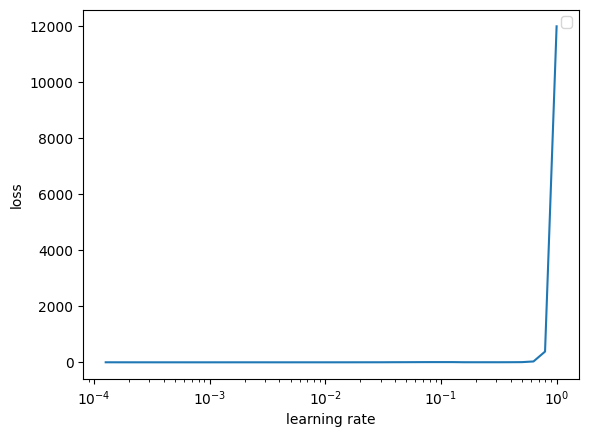

In [13]:


import matplotlib.pyplot as plt

plt.figure()
plt.plot(tabLearningRate, tabLoss)
plt.xlabel('learning rate')
plt.xscale('log')
plt.ylabel('loss')
plt.legend()

plt.show()

In [14]:


min_y = min(tabLoss)
min_index = tabLoss.index(min_y)

LearningRate = tabLearningRate[min_index]
print('best LearningRate:',LearningRate)
#best LearningRate: 0.0008912509381337458

best LearningRate: 0.001


In [ ]:


from torch.utils.tensorboard import SummaryWriter
import torch
import torch.nn as nn
import time

# === Hyperparamètres ===
LearningRate = 0.001
num_epochs = 1

model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LearningRate)

# 🔥 Scheduler : réduction du LR toutes les 5 époques par facteur 0.5
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.65)

# === Variables de suivi ===
bestLoss_Loss = float('inf')
bestAccuracy_Loss = 0.0
lossCount = 0
accuracyCount = 0
epoch = 0

writer = SummaryWriter()

epoch_best_loss = 0
epoch_best_accuracy = 0

# === Boucle d'entraînement ===
while True:
    epoch += 1
    model.train()
    start_time = time.time()
    
    accuracy_train, loss_train = trainModel(model, criterion, optimizer, train_generator)
    epoch_time_train = time.time() - start_time

    # Scheduler step toutes les époques
    scheduler.step()

    # Récupérer le learning rate courant
    current_lr = optimizer.param_groups[0]['lr']

    # === Enregistrement TensorBoard ===
    writer.add_scalar('Loss/train', loss_train, epoch)
    writer.add_scalar('Accuracy/train', accuracy_train, epoch)
    writer.add_scalar('LearningRate', current_lr, epoch)

    # === Validation ===
    model.eval()
    with torch.no_grad():
        start_time = time.time()
        accuracy_val, loss_val = ValidatModel(model, criterion, optimizer, validation_generator)
        epoch_time_val = time.time() - start_time

        # === Sauvegarde du meilleur modèle ===
        if loss_val < bestLoss_Loss:
            print("🎯 New best model!")
            bestLoss_Loss = loss_val
            bestAccuracy_Loss = accuracy_val
            epoch_best_loss = epoch
            torch.save(model.state_dict(), ' templates/assets/music/best_model_original_loss.pth')
            lossCount = 0
        else:
            lossCount += 1

        # === Early stopping après 20 époques sans amélioration ===
        if lossCount > 20:
            print("🛑 Early stopping triggered.")
            break

        # === Logs console ===
        print(
            f"Epoch {epoch:03d} | LR: {current_lr:.6f} | "
            f"Train Loss: {loss_train:.4f} | Train Acc: {accuracy_train:.4f} | "
            f"Val Loss: {loss_val:.4f} | Val Acc: {accuracy_val:.4f} | "
            f"Time (train/val): {epoch_time_train:.2f}/{epoch_time_val:.2f}s"
        )

writer.close()

🎯 New best model!
Epoch 001 | LR: 0.001000 | Train Loss: 2.0456 | Train Acc: 0.2854 | Val Loss: 2.1687 | Val Acc: 0.1900 | Time (train/val): 15.44/0.19s
🎯 New best model!
Epoch 002 | LR: 0.001000 | Train Loss: 1.5864 | Train Acc: 0.4643 | Val Loss: 1.5127 | Val Acc: 0.4100 | Time (train/val): 15.25/0.20s
🎯 New best model!
Epoch 003 | LR: 0.001000 | Train Loss: 1.4286 | Train Acc: 0.5119 | Val Loss: 1.3662 | Val Acc: 0.4900 | Time (train/val): 15.16/0.19s
🎯 New best model!
Epoch 004 | LR: 0.001000 | Train Loss: 1.2736 | Train Acc: 0.5757 | Val Loss: 1.2845 | Val Acc: 0.5500 | Time (train/val): 15.15/0.18s
🎯 New best model!
Epoch 005 | LR: 0.001000 | Train Loss: 1.1523 | Train Acc: 0.6408 | Val Loss: 1.1858 | Val Acc: 0.6000 | Time (train/val): 15.21/0.19s
🎯 New best model!
Epoch 006 | LR: 0.001000 | Train Loss: 1.0447 | Train Acc: 0.6809 | Val Loss: 1.1755 | Val Acc: 0.5700 | Time (train/val): 15.42/0.22s
🎯 New best model!
Epoch 007 | LR: 0.001000 | Train Loss: 0.9687 | Train Acc: 0.704

In [ ]:

print("Model loss : ")
print("loss :")
print(bestLoss_Loss)
print("accuracy :")
print(bestAccuracy_Loss)


model.load_state_dict(torch.load(' templates/assets/music/best_model_original_loss.pth'))

Model loss : 
loss :
0.7820293456315994
accuracy :
0.73


<All keys matched successfully>

In [17]:


classes = ('blues', 'classical', 'country', 'disco', 'hiphop','jazz','metal','pop','reggae', 'rock')

# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in validation_generator:
        images, labels = data
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: blues is 100.0 %
Accuracy for class: classical is 80.0 %
Accuracy for class: country is 60.0 %
Accuracy for class: disco is 40.0 %
Accuracy for class: hiphop is 80.0 %
Accuracy for class: jazz  is 70.0 %
Accuracy for class: metal is 90.0 %
Accuracy for class: pop   is 80.0 %
Accuracy for class: reggae is 70.0 %
Accuracy for class: rock  is 60.0 %


In [18]:


correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_generator:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 100 test images: {100 * correct // total} %')

Accuracy of the network on the 100 test images: 74 %


In [19]:


import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Features and labels from validation generator
features = []
labels = []
classes = ('blues', 'classical', 'country', 'disco', 'hiphop','jazz','metal','pop','reggae', 'rock')

with torch.no_grad():
    for data in train_generator:
        images, labels_batch = data
        outputs_batch = model(images)
        features.extend(outputs_batch.numpy())  # Convert to numpy array
        labels.extend(labels_batch.numpy())

features = np.array(features)
labels = np.array(labels)
print (labels)

pca = PCA(n_components=2)  # 2 components for 2D space
projected = pca.fit_transform(features)

[4 9 0 1 9 7 5 9 4 0 3 8 6 4 0 9 1 7 6 3 1 1 6 8 6 9 9 8 8 2 7 9 7 6 7 7 8
 0 2 6 1 0 2 1 2 2 0 6 4 1 5 9 4 4 7 9 1 3 8 8 5 6 6 3 8 4 5 3 1 9 2 9 5 0
 6 6 0 5 9 0 4 8 6 2 5 5 8 2 2 1 2 3 6 4 4 2 5 7 5 0 6 8 0 7 4 3 5 2 6 4 4
 5 1 5 8 4 8 0 8 9 3 7 0 3 5 2 6 8 9 7 2 9 6 0 7 4 2 9 1 3 8 9 0 1 7 3 6 5
 6 4 3 9 7 5 0 0 4 3 1 8 5 7 7 1 4 0 8 7 7 0 6 2 8 0 6 7 5 3 4 7 2 1 8 0 2
 8 9 2 4 5 6 2 6 6 5 3 0 3 7 4 0 1 9 5 3 3 8 9 9 3 9 8 2 6 4 6 7 1 7 5 0 6
 8 6 7 9 0 8 6 0 9 1 9 5 6 8 3 8 9 7 7 0 7 1 7 2 7 4 1 1 5 1 2 7 3 6 5 0 2
 8 9 2 2 2 7 8 1 8 2 8 7 0 3 7 6 5 6 1 4 6 6 4 4 3 8 8 9 3 9 6 2 7 5 4 3 2
 4 4 1 2 3 4 7 4 4 2 4 0 5 9 8 8 3 5 2 4 2 8 7 6 0 0 2 3 8 1 8 4 2 3 3 3 7
 8 2 6 9 1 9 5 6 3 6 8 5 6 3 7 1 2 6 3 4 5 1 9 0 3 2 6 1 5 0 0 8 3 8 9 5 3
 3 8 2 2 0 7 7 5 8 7 0 6 4 7 1 4 1 1 1 3 4 6 4 2 6 4 2 1 2 0 6 5 5 6 5 3 2
 9 7 7 5 6 3 1 9 8 5 1 0 1 8 9 5 8 0 5 5 4 0 5 8 5 3 4 0 3 3 0 7 4 5 6 4 0
 4 1 3 4 9 6 1 2 5 2 2 1 3 3 6 5 1 8 3 6 9 9 0 8 0 3 5 0 8 2 7 0 8 9 4 8 4
 4 2 2 2 8 6 7 0 9 8 7 5 

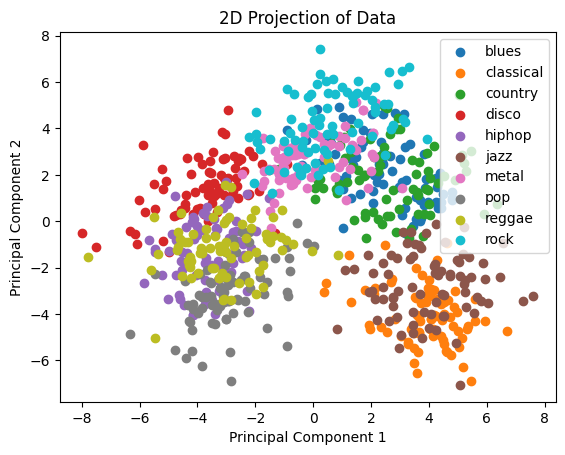

In [20]:


# Plot 2D projection
plt.figure()
for class_label in np.unique(labels):
    indices = labels == class_label
    plt.scatter(projected[indices, 0], projected[indices, 1], label=classes[class_label])

plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Projection of Data')
plt.show()

In [21]:


import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Features and labels from validation generator
features = []
labels = []

with torch.no_grad():
    for data in validation_generator:
        images, labels_batch = data
        outputs_batch = model(images)
        features.extend(outputs_batch.numpy())  # Convert to numpy array
        labels.extend(labels_batch.numpy())

features = np.array(features)
labels = np.array(labels)

pca = PCA(n_components=2)  # 2 components for 2D space
projected = pca.fit_transform(features)

/home/gabriel/anaconda3/envs/cine_reco/lib/python3.12/site-packages/torch/nn/functional.py:1535: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


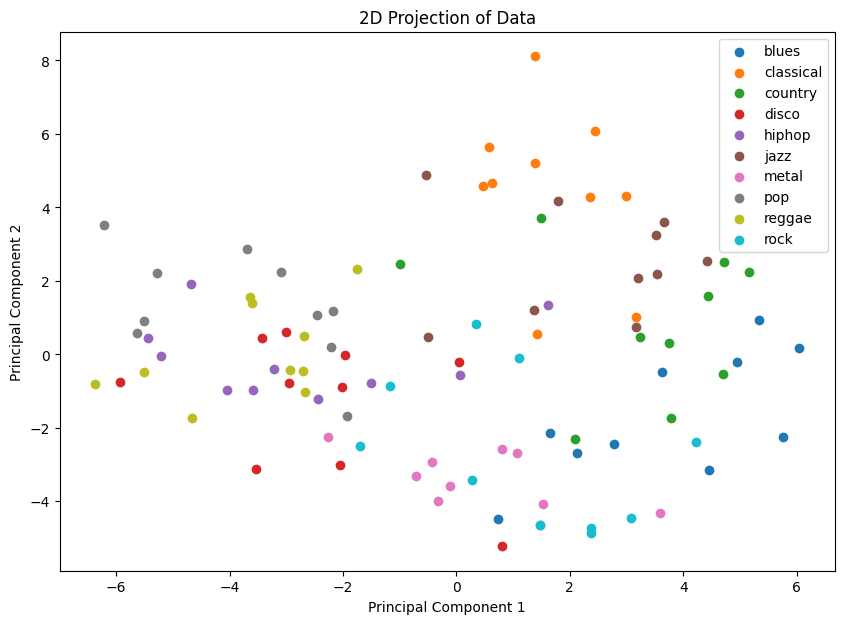

In [22]:


# Plot 2D projection
plt.figure(figsize=(10, 7))
for class_label in np.unique(labels):
    indices = labels == class_label
    plt.scatter(projected[indices, 0], projected[indices, 1], label=classes[class_label])

plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Projection of Data')
plt.show()

/home/gabriel/anaconda3/envs/cine_reco/lib/python3.12/site-packages/torch/nn/functional.py:1535: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


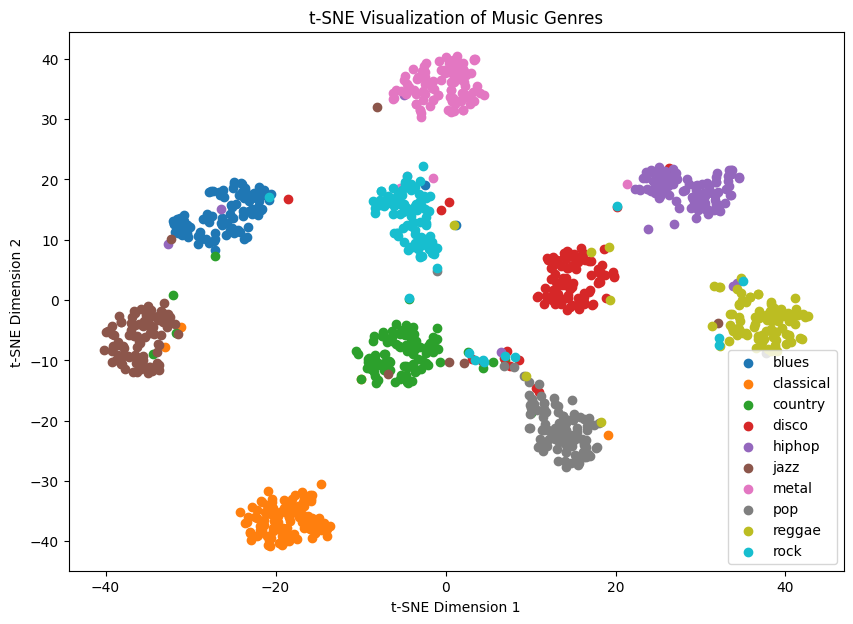

In [23]:


import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Créer une fonction pour extraire les caractéristiques de votre modèle CNN
def extract_features(data_loader, model):
    features = []
    labels = []
    model.eval()
    with torch.no_grad():
        for inputs, targets in data_loader:
            # Obtenez les caractéristiques de la dernière couche avant la classification
            outputs = model(inputs)
            features.extend(outputs.cpu().numpy())  # Convertir les tensors en numpy arrays
            labels.extend(targets.cpu().numpy())
    return np.array(features), np.array(labels)

# Obtenir les caractéristiques des ensembles d'entraînement, de validation et de test
train_features, train_labels = extract_features(train_generator, model)
val_features, val_labels = extract_features(validation_generator, model)
test_features, test_labels = extract_features(test_generator, model)

# Concaténer les caractéristiques et les étiquettes pour t-SNE
all_features = np.concatenate((train_features, val_features, test_features), axis=0)
all_labels = np.concatenate((train_labels, val_labels, test_labels), axis=0)

# Réduire les dimensions à 2D avec t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings = tsne.fit_transform(all_features)

# Plot t-SNE embeddings
plt.figure(figsize=(10, 7))
for i in range(len(classes)):
    indices = all_labels == i
    plt.scatter(embeddings[indices, 0], embeddings[indices, 1], label=classes[i])
plt.title('t-SNE Visualization of Music Genres')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

/home/gabriel/anaconda3/envs/cine_reco/lib/python3.12/site-packages/torch/nn/functional.py:1535: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


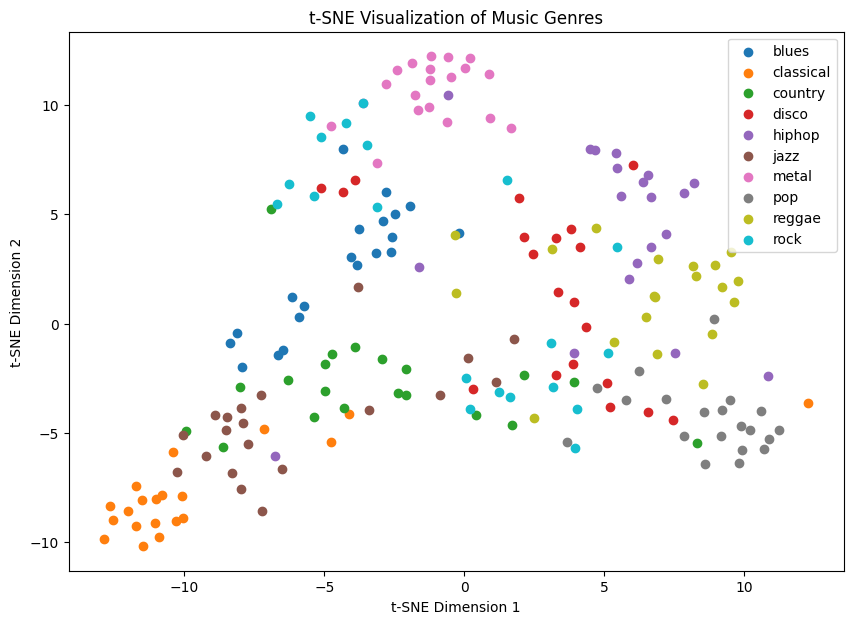

In [24]:


import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Créer une fonction pour extraire les caractéristiques de votre modèle CNN
def extract_features(data_loader, model):
    features = []
    labels = []
    model.eval()
    with torch.no_grad():
        for inputs, targets in data_loader:
            # Obtenez les caractéristiques de la dernière couche avant la classification
            outputs = model(inputs)
            features.extend(outputs.cpu().numpy())  # Convertir les tensors en numpy arrays
            labels.extend(targets.cpu().numpy())
    return np.array(features), np.array(labels)

# Obtenir les caractéristiques des ensembles d'entraînement, de validation et de test
train_features, train_labels = extract_features(train_generator, model)
val_features, val_labels = extract_features(validation_generator, model)
test_features, test_labels = extract_features(test_generator, model)

# Concaténer les caractéristiques et les étiquettes pour t-SNE

#all_features = np.concatenate((train_features, val_features, test_features), axis=0)
#all_labels = np.concatenate((train_labels, val_labels, test_labels), axis=0)

#validation + test
all_features =  np.concatenate((val_features, test_features), axis=0)
all_labels = np.concatenate((val_labels, test_labels), axis=0)

#uniquement test
#all_features =  test_features
#all_labels = test_labels


# Réduire les dimensions à 2D avec t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings = tsne.fit_transform(all_features)

# Plot t-SNE embeddings
plt.figure(figsize=(10, 7))
for i in range(len(classes)):
    indices = all_labels == i
    plt.scatter(embeddings[indices, 0], embeddings[indices, 1], label=classes[i])
plt.title('t-SNE Visualization of Music Genres')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()




In [25]:

# --- Feature Extraction and PCA ---
print("Extracting features from test set...")
test_features, test_labels_array, test_predictions = extract_features_from_model_pytorch(
    model, test_generator
)
print(f"Extracted features shape: {test_features.shape}")

print("\nPerforming PCA analysis...")
test_pca_features, pca_model, scaler = perform_pca_analysis_pytorch(test_features, test_labels_array)

# Create a DataFrame for visualization/manipulation
# We need to get the track IDs from the test set. This is not straightforward as the dataloader does not provide it.
# For demonstration, we will generate dummy track IDs.
track_ids = [f"track_{i}" for i in range(len(test_labels_array))]
pca_df = pd.DataFrame({
    'PC1': test_pca_features[:, 0],
    'PC2': test_pca_features[:, 1],
    'genre_label_id': test_labels_array,
    'track_id': track_ids
})

# Add genre names
genre_names = list(label_mapping.keys())
pca_df['genre_name'] = pca_df['genre_label_id'].map(lambda x: genre_names[x])

print(f"PCA DataFrame shape: {pca_df.shape}")
print(pca_df.head())

Extracting features from test set...
Extracted features shape: (100, 10)

Performing PCA analysis...
PCA explained variance ratio: [0.2676057  0.24214111]
Total explained variance: 0.510
PCA DataFrame shape: (100, 5)
        PC1       PC2  genre_label_id track_id genre_name
0  0.797276 -0.187739               0  track_0      blues
1  1.837394 -0.440036               6  track_1      metal
2  1.929802  0.881441               5  track_2       jazz
3 -1.148450 -2.347577               3  track_3      disco
4  2.236642 -0.298693               6  track_4      metal


/home/gabriel/anaconda3/envs/cine_reco/lib/python3.12/site-packages/torch/nn/functional.py:1535: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


In [26]:

# --- Playlist Generation Example ---
available_tracks = pca_df['track_id'].tolist()
track1 = random.choice(available_tracks)
track2 = random.choice([t for t in available_tracks if t != track1])

print(f"Generating playlist between {track1} and {track2}...")
playlist, line_points, p1, p2 = generate_playlist_line_pytorch(pca_df, track1, track2, num_tracks=10)

# Display playlist
if playlist:
    print("\nGenerated Playlist:")
    print("-" * 80)
    for track in playlist:
        print(f"{track['position']:2d}. {track['track_id']} ({track['genre']}) - "
              f"Distance: {track['distance_to_line']:.3f}")

    total_distance = sum(track['distance_to_line'] for track in playlist)
    avg_distance = total_distance / len(playlist)
    print(f"\nPlaylist Quality Metrics:")
    print(f"Average distance to line: {avg_distance:.3f}")
    print(f"Total distance: {total_distance:.3f}")

Generating playlist between track_17 and track_68...
Track 1 (track_17): PC1=-1.363, PC2=0.371
Track 2 (track_68): PC1=1.567, PC2=-0.875

Generated Playlist:
--------------------------------------------------------------------------------
 1. track_17 (country) - Distance: 0.000
 2. track_70 (pop) - Distance: 0.303
 3. track_44 (country) - Distance: 0.290
 4. track_59 (hiphop) - Distance: 0.328
 5. track_86 (disco) - Distance: 0.101
 6. track_10 (rock) - Distance: 0.153
 7. track_30 (reggae) - Distance: 0.163
 8. track_27 (metal) - Distance: 0.348
 9. track_80 (blues) - Distance: 0.229
10. track_68 (blues) - Distance: 0.000

Playlist Quality Metrics:
Average distance to line: 0.191
Total distance: 1.915


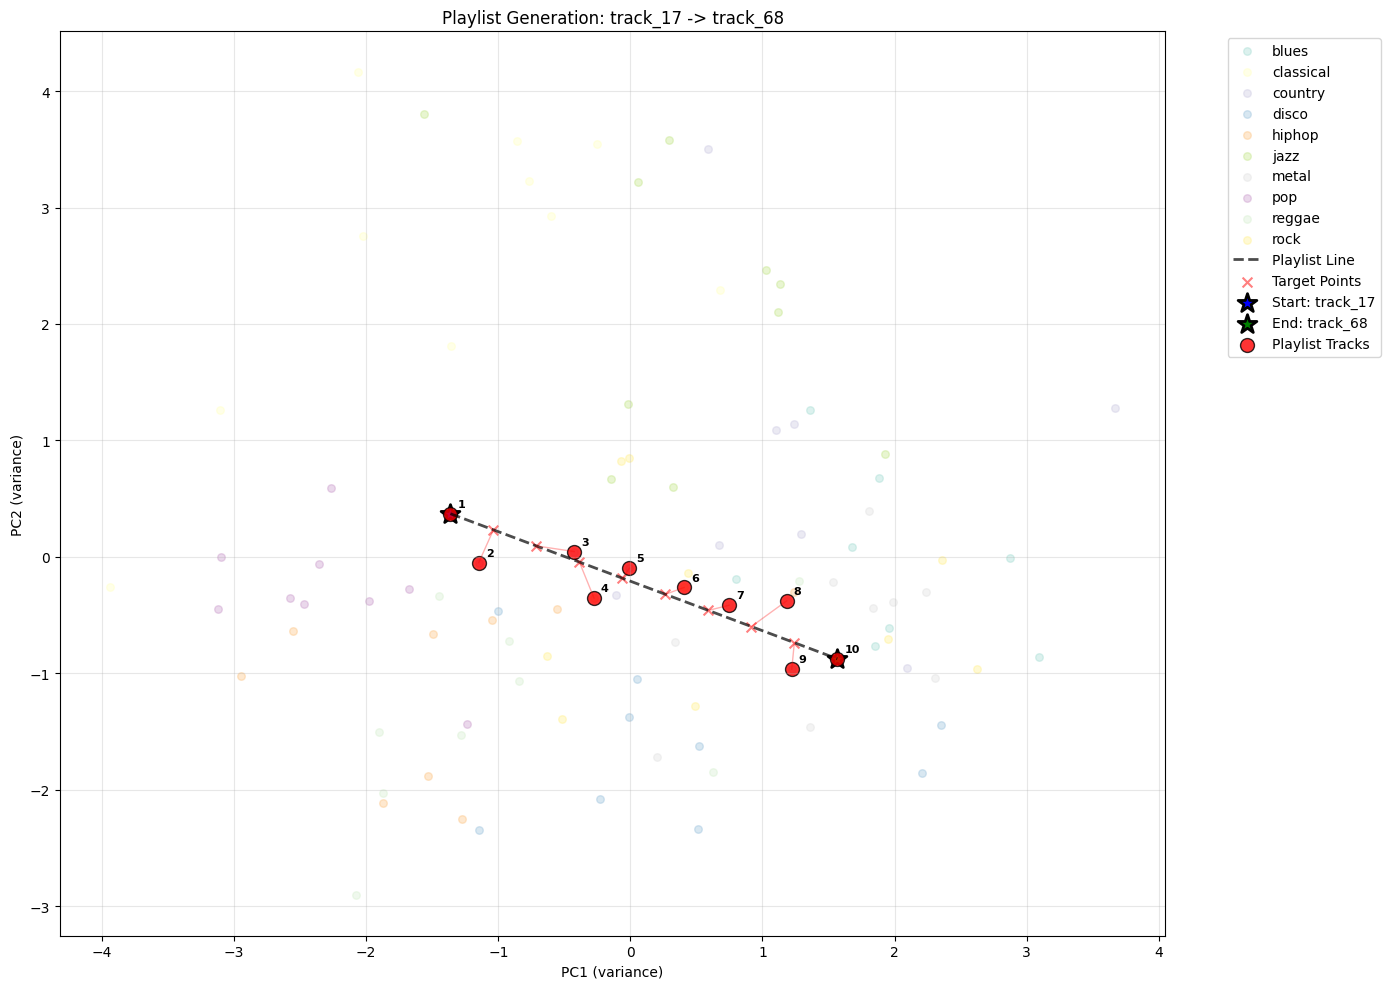

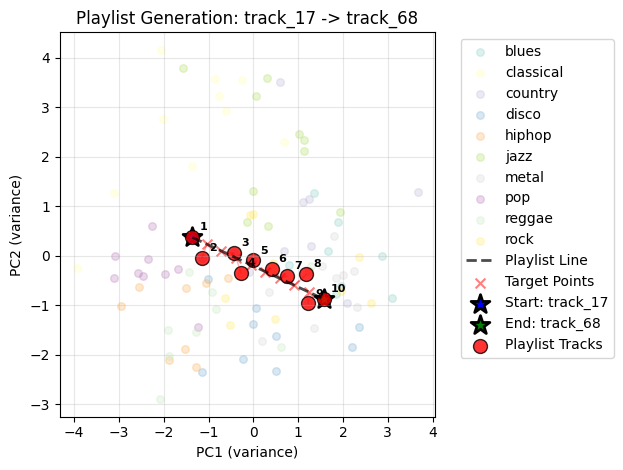

In [27]:

# --- Visualize Playlist ---
if playlist:
    visualize_playlist_pytorch(pca_df, playlist, line_points, p1, p2, track1, track2, genre_names)

In [28]:

# --- Interactive Playlist Generator ---
interactive_playlist_generator_pytorch(pca_df, genre_names)

Available tracks (first 20 shown):
 1. track_0 (blues)
 2. track_1 (metal)
 3. track_2 (jazz)
 4. track_3 (disco)
 5. track_4 (metal)
 6. track_5 (hiphop)
 7. track_6 (reggae)
 8. track_7 (disco)
 9. track_8 (pop)
10. track_9 (country)
11. track_10 (rock)
12. track_11 (reggae)
13. track_12 (jazz)
14. track_13 (rock)
15. track_14 (jazz)
16. track_15 (classical)
17. track_16 (reggae)
18. track_17 (country)
19. track_18 (disco)
20. track_19 (metal)

Example usage:
track1 = pca_df.iloc[0]['track_id']  # First track
track2 = pca_df.iloc[10]['track_id']  # Eleventh track
playlist, line_points, p1, p2 = generate_playlist_line_pytorch(pca_df, track1, track2, num_tracks=8)
visualize_playlist_pytorch(pca_df, playlist, line_points, p1, p2, track1, track2, genre_names)


In [29]:

# --- Analyze Playlist Quality ---
if playlist:
    analysis = analyze_playlist_quality_pytorch(playlist, pca_df, genre_names)
    if analysis:
        print("\nPLAYLIST QUALITY ANALYSIS")
        print("="*40)
        print(f"Number of tracks: {analysis['num_tracks']}")
        print(f"Unique genres: {analysis['unique_genres']}")
        print(f"Genre diversity ratio: {analysis['genre_diversity_ratio']:.2f}")
        print(f"Average distance to line: {analysis['avg_distance_to_line']:.3f}")
        print(f"Standard deviation of distances: {analysis['std_distance_to_line']:.3f}")
        print(f"Maximum distance to line: {analysis['max_distance_to_line']:.3f}")
        print(f"Average smoothness: {analysis['avg_smoothness']:.3f}")
        print("\nGenre distribution:")
        for genre, count in analysis['genre_distribution'].items():
            print(f"  {genre}: {count} tracks")


PLAYLIST QUALITY ANALYSIS
Number of tracks: 10
Unique genres: 8
Genre diversity ratio: 0.80
Average distance to line: 0.191
Standard deviation of distances: 0.123
Maximum distance to line: 0.348
Average smoothness: 0.467

Genre distribution:
  country: 2 tracks
  blues: 2 tracks
  hiphop: 1 tracks
  pop: 1 tracks
  disco: 1 tracks
  rock: 1 tracks
  reggae: 1 tracks
  metal: 1 tracks
